In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../../data/raw/WineQuality/winequality-red.csv', delimiter=';', encoding='utf-8')

In [3]:
data.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
X = data.drop('quality', axis=1)
y = data['quality']

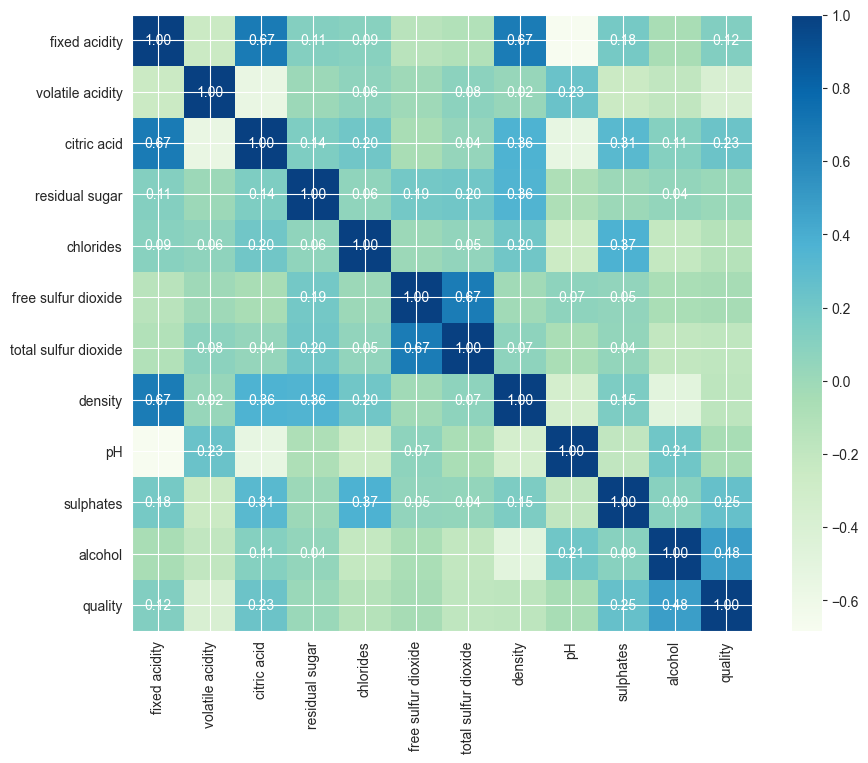

In [9]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Compute the average correlation excluding 1
average_corr = np.mean(correlation_matrix.values[correlation_matrix.values != 1])

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='GnBu', interpolation='none', aspect='auto')

# Set labels
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

# Add text annotations for values above average (excluding 1)
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        if value > 1:
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='w')
        elif value > average_corr:
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='w')

# Add colorbar
plt.colorbar()

# Show the plot
plt.show()

In [10]:
correlation_matrix.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,12.0,0.132295,0.460298,-0.682978,-0.123335,0.104241,0.304266,1.0
volatile acidity,12.0,-0.023026,0.392134,-0.552496,-0.257345,-0.004293,0.065091,1.0
citric acid,12.0,0.159438,0.437610,-0.552496,0.011405,0.173700,0.325814,1.0
residual sugar,12.0,0.169744,0.286498,-0.085652,0.011681,0.085193,0.191044,1.0
chlorides,12.0,0.118685,0.330876,-0.265026,-0.028055,0.058454,0.201430,1.0
free sulfur dioxide,12.0,0.134586,0.344622,-0.153794,-0.053237,-0.002471,0.099545,1.0
total sulfur dioxide,12.0,0.131157,0.355559,-0.205654,-0.078166,0.045174,0.108109,1.0
density,12.0,0.149664,0.415475,-0.496180,-0.060189,0.109888,0.357699,1.0
pH,12.0,-0.060599,0.432671,-0.682978,-0.284194,-0.076073,0.104191,1.0
sulphates,12.0,0.166919,0.321947,-0.260987,0.033592,0.121051,0.266740,1.0
